In [171]:
'''Note: 

* Before writing any code remember that this assigment is for helping you understand the basics of file
handling in csv file. 

* This project is designed to have a work flow such that everyone is in same page for this purpose the variables are
given a strict name which should not be changed or modified according to your convinience

* Few of new functions like .head() .xticks().... and concepts may have been introduced in the assingment, so we encourage you
all to go through them without skipping.

*  functions which are to be used in the Your code sections are globally available so try to look for those where you have been prompted
'''

'''Its the data of a meal delivery company which operates in multiple cities. 
They have various fulfillment centers in these cities for dispatching meal orders to their customers.
train.csv: Historical data of demand for a product-center combination 
fulfilment_center_info.csv: Information for fulfillment center like center area, city information etc.
meal_info.csv: Product(Meal) features such as category, sub-category, current price and discount'''


'''START CODE'''

#Import necessary libraries: Numpy,pandas,matplotlib

'''************************Your code here**********************'''
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt 
'''************************************************************'''

'************************************************************'

In [172]:
#read meal_info.csv file from provided dataset into a df_meal named variable
#Note: Proper file directory should be provided

'''************************Your code here**********************'''
df_meal=pd.read_csv("C:\\Users\\karti\\Desktop\\meal_info.csv")
'''************************************************************'''


'''This is for displaying first five data points'''
df_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [173]:
#read fulfilment_center_info.csv file from provided dataset
#Note: Proper file directory should be provided

'''************************Your code here**********************'''
df_center=pd.read_csv("C:\\Users\\karti\\Desktop\\fulfilment_center_info.csv")
'''************************************************************'''

'''This is for displaying first five data points'''
df_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [174]:
#read train.csv file from provided dataset
#Note: Proper file directory should be provided

'''************************Your code here**********************'''
df_food=pd.read_csv("C:\\Users\\karti\\Desktop\\train.csv")
'''************************************************************'''

df_food.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [175]:
'''Since the provided information is in different files, your work here is to merge them.Look for the functions
in pandas library to do so'''

'''************************Your code here**********************'''
result1=pd.merge(df_center,df_food, on=['center_id'])
df=pd.merge(result1,df_meal, on=['meal_id'])
'''************************************************************'''
df.head()

,center_id,city_code,region_code,center_type,op_area,id,week,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,11,679,56,TYPE_A,3.7,1103215,1,1885,136.83,136.83,0,0,959,Beverages,Thai
1,11,679,56,TYPE_A,3.7,1091356,2,1885,133.86,135.86,0,0,1054,Beverages,Thai
2,11,679,56,TYPE_A,3.7,1195933,3,1885,135.86,133.86,0,0,891,Beverages,Thai
3,11,679,56,TYPE_A,3.7,1425602,4,1885,134.86,135.86,0,0,1107,Beverages,Thai
4,11,679,56,TYPE_A,3.7,1249127,5,1885,146.53,146.53,0,0,919,Beverages,Thai


In [176]:
'''Here we have used pd.pivot_table() kindly go through the function and mention in comment what it does'''

table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)
table.head()

,num_orders
category,
Beverages,40480525
Biryani,631848
Desert,1940754
Extras,3984979
Fish,871959


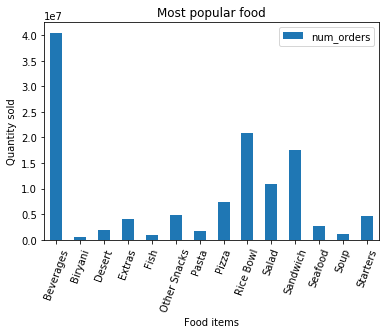

In [177]:
'''Graph tweaking
************************
Plot a bar graph with title 'Most popular food' for category(x-axis) vs number-of-orders(y-axis)

give x label 'Food items'
give y label 'Quantity sold'


'''

'''************Yourcode*********************'''

#bar graph
table.plot(kind='bar')
#xticks 
plt.xticks(rotation=70) 
'''Write on comment what you feel this function does'''

#x-axis labels 
plt.xlabel('Food items')

#y-axis labels 
plt.ylabel('Quantity sold')

#plot title 
plt.title('Most popular food')

#save plot 
plt.savefig("C:\\Users\\karti\\Desktop\\bar_graph.png")

#display 
plt.show()

In [178]:
'''************************************************'''

'''Comparison of weekly and monthly sales
 Create a new column
* named 'revenue' where each element is product of checkout_price and num_orders 
** named 'month' by using ['week'] column (week column value divided by 4 gives month value)'''

'''**************************Your code******************************'''
rev=np.array(df[['checkout_price']])*np.array(df[['num_orders']])
df['revenue']=rev
mon=df[['week']]//4
df['month']=mon
'''******************************************************************'''
df.head()

,center_id,city_code,region_code,center_type,op_area,id,week,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,revenue,month
0,11,679,56,TYPE_A,3.7,1103215,1,1885,136.83,136.83,0,0,959,Beverages,Thai,131219.97,0
1,11,679,56,TYPE_A,3.7,1091356,2,1885,133.86,135.86,0,0,1054,Beverages,Thai,141088.44,0
2,11,679,56,TYPE_A,3.7,1195933,3,1885,135.86,133.86,0,0,891,Beverages,Thai,121051.26,0
3,11,679,56,TYPE_A,3.7,1425602,4,1885,134.86,135.86,0,0,1107,Beverages,Thai,149290.02,1
4,11,679,56,TYPE_A,3.7,1249127,5,1885,146.53,146.53,0,0,919,Beverages,Thai,134661.07,1


In [179]:
'''Here we have created two list month and month_order ,
store month number in month list and revenue of each month in month_order'''
#list to store month-wise revenue 
'''***********************************Your code***********************'''
month=df.month.unique()
#k=df.groupby('month')['revenue'].transform('sum')
k=pd.pivot_table(data=df,index='month',values='revenue',aggfunc=np.sum)
#print(k)
month_order=np.array(k)
#print(month_order)
'''*********************************************************************'''



'*********************************************************************'

In [180]:
'''Here we have created two list week and week_order ,you need to store in them mapping the monthly orders'''    
#list to store week-wise revenue 
'''***********************************Your code***********************'''
week=df.week.unique()
#print(week)
k=pd.pivot_table(data=df,index='week',values='revenue',aggfunc=np.sum)
#print(k)
week_order=np.array(k)
#print(week_order)

' Display the plot'

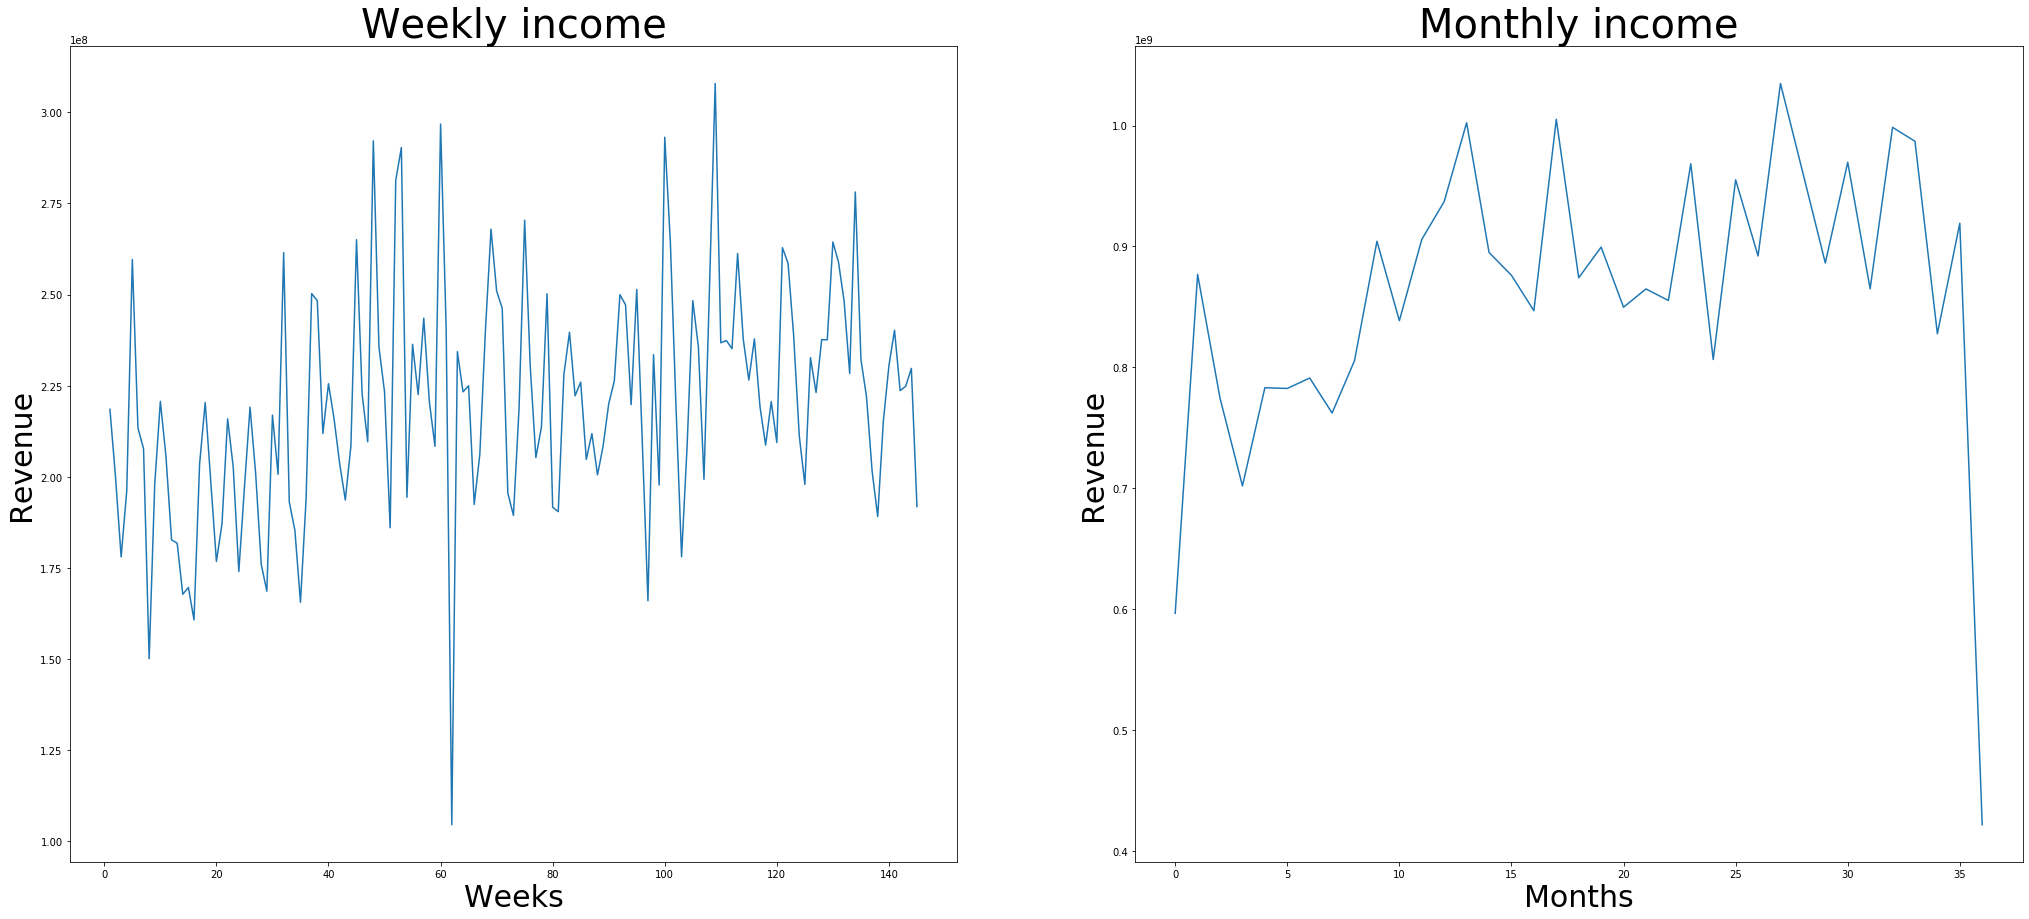

In [181]:
'''*********************************************************************'''
''' Plot two subplots in the same space : one for weekly revenue and other for monthly revenue.
For weekly : Title(Weekly income),x_label(week),y_label(revenue); similarly for monthly revenue.
'''

'''************Yourcode*********************'''

f, (ax1, ax2) = plt.subplots(1,2)
f.set_figheight(15)
f.set_figwidth(35)
ax1.plot(week,week_order)
ax2.plot(month,month_order)
ax1.set_title('Weekly income',size=40)
ax1.set_xlabel('Weeks',size=30)
ax1.set_ylabel('Revenue',size=30)
ax2.set_title('Monthly income',size=40)
ax2.set_xlabel('Months',size=30)
ax2.set_ylabel('Revenue',size=30)
''' Display the plot'''